In [1]:
####################################################################################
#                  ASSIGNMENT KEELA - CANDIDATE: ANNABELLE CHUINARD                # 
#                             PART 2: DATA ANALYSIS                                #
####################################################################################

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [3]:
samplePath = '/home/anabel/Keela/data/'

In [4]:
df = pd.read_csv(
    samplePath +'full_sample_clean.csv', 
    sep=',')
df_encoded = pd.read_csv(
    samplePath +'encodedFeatures.csv', 
    sep=',')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
Unnamed: 0        48842 non-null int64
age               48842 non-null int64
workclass         48842 non-null object
fnl_samp_wgt      48842 non-null int64
education         48842 non-null object
marital_status    48842 non-null object
occupation        48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital_gain      48842 non-null int64
capital_loss      48842 non-null int64
hours_per_week    48842 non-null int64
native_country    48842 non-null object
income            48842 non-null int64
dtypes: int64(7), object(7)
memory usage: 5.2+ MB


In [6]:
### PART 2A: 1-VARIABLE ANALYSIS ###

In [7]:
## AGE (not accounting for census bias)
df_skim=df.sample(n=2000, random_state=1) #sample is quite big, picking 2000 random candidates

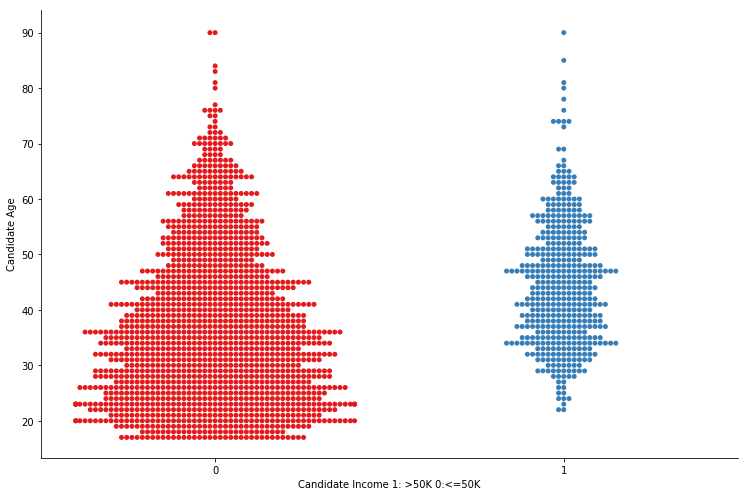

In [8]:
sns.catplot(x='income', y='age', data=df_skim, kind='swarm', height=7, aspect=1.5, palette='Set1')
plt.xlabel("Candidate Income 1: >50K 0:<=50K")
plt.ylabel("Candidate Age")
plt.show()

In [9]:
# IMPORTANT: These distributions do not account for sampling biases.

# Observations: A large majority of people in this sample earn less than 50k/year. 
# The blue distribution (income <=50k) centroid is clearly displaced towards lower ages (around 26 years old)
# compared to that of the orange distribution (income >50k)


In [10]:
# AGE (census-bias-weighted)

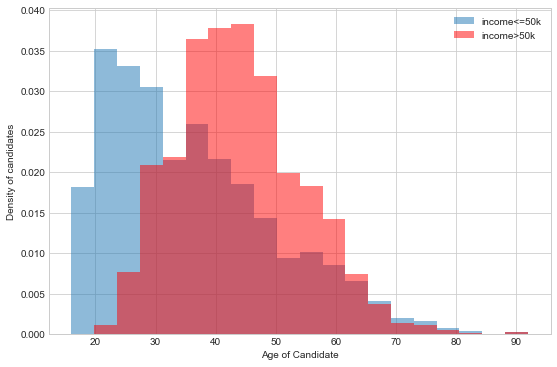

In [11]:
# To account for sampling biases, distribution have to be reweighted based on precalculated weights for each candidate 'fnl_samp_wgt'
# For simplicity, I normalized these weights such that the largest value equals 1.0.

norm = df.iloc[df.fnl_samp_wgt.idxmax()]['fnl_samp_wgt'] #finding the maximal weight
df['fnl_samp_wgt_norm'] = df['fnl_samp_wgt']/norm #creating new column with normalized value

# Ploting weighted distributions (normalized to 1) using matplotlib 
# Choosing binning carefuly to avoid oversampling. 

df['age_cat_poor'] = np.where(df['income']==0, df['age'], float(-1.))
df['age_cat_rich'] = np.where(df['income']==1, df['age'], float(-1.))

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(9,6))

plt.hist(x='age_cat_poor', data= df, bins=20, weights='fnl_samp_wgt_norm', range=(16,92),alpha=0.5, label='income<=50k', density=True)
plt.hist(x='age_cat_rich', data= df, bins=20, weights='fnl_samp_wgt_norm', range=(16,92),alpha=0.5, label='income>50k', color='red', density='True')

plt.legend(loc='upper right')
plt.xlabel("Age of Candidate")
plt.ylabel("Density of candidates")
plt.show()

# Observation1: With these normalized distributions we clearly see that the turn point is around 35 years old.

# Observation2: Reweighting by 'fnl_samp_wgt_norm' did not change the distributions's shape that much compared to the non-weighted catplot.
# At least now we know that the effect of census bias is tiny. :-)

In [12]:
# NUMBER OF HOURS WORKED PER WEEK (census bias weighted)

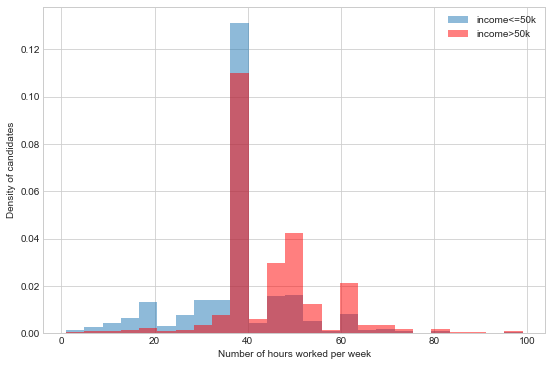

In [13]:
##### To account for sampling biases, distribution have to be reweighted based on precalculated weights for each candidate 'fnl_samp_wgt'
# For simplicity, I normalized these weights such that the largest value equals 1.0.

norm = df.iloc[df.fnl_samp_wgt.idxmax()]['fnl_samp_wgt'] #finding the maximal weight
df['fnl_samp_wgt_norm'] = df['fnl_samp_wgt']/norm #creating new column with normalized value

# Ploting weighted distributions (normalized to 1) using matplotlib 
# Choosing binning carefuly to avoid oversampling. 

df['hpw_cat_poor'] = np.where(df['income']==0, df['hours_per_week'], float(-1.))
df['hpw_cat_rich'] = np.where(df['income']==1, df['hours_per_week'], float(-1.))


plt.figure(figsize=(9,6))
plt.style.use('seaborn-whitegrid')

plt.hist(x='hpw_cat_poor', data= df, bins=25, weights='fnl_samp_wgt_norm', range=(1,99),alpha=0.5, label='income<=50k', density=True)
plt.hist(x='hpw_cat_rich', data= df, bins=25, weights='fnl_samp_wgt_norm', range=(1,99),alpha=0.5, label='income>50k', color='red', density='True')

plt.legend(loc='upper right')
plt.xlabel("Number of hours worked per week")
plt.ylabel("Density of candidates")
plt.show()

# Observation: People working a large number of hours per week, logically earn more per year.

In [14]:
## PART 2B: 2-VARIABLE ANALYSIS (not census bias weighted)

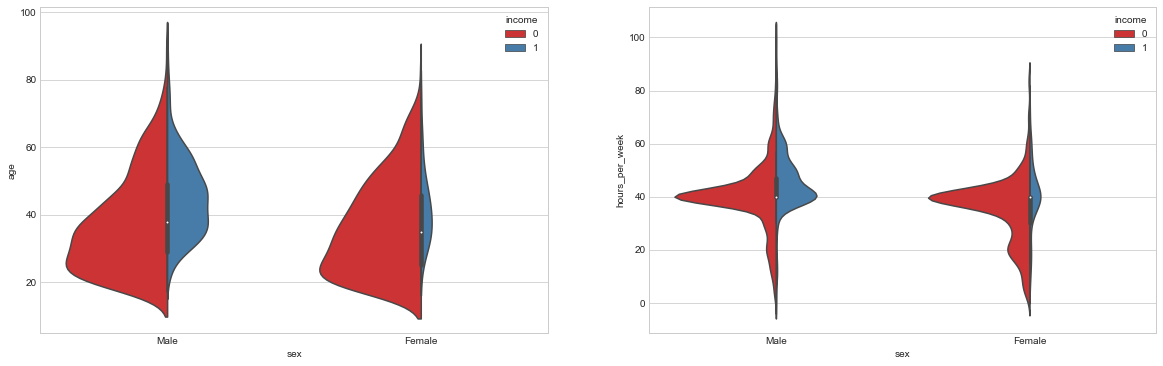

In [15]:
fig = plt.figure(figsize=(20,6))
plt.style.use('seaborn-whitegrid')

plt.subplot(1, 2, 1)
sns.violinplot(x='sex', y='age', hue='income', data=df_skim, split=True, scale='count', palette="Set1");
plt.subplot(1, 2, 2)
sns.violinplot(x='sex', y='hours_per_week', hue='income', data=df_skim, split=True, scale='count', palette="Set1");
plt.show()


In [16]:
# Observation 1: The ratio of men earning more than 50k is bigger than the ratio of female earning more than 50k. 
# Observation 2: Women who earn more than 50k don't work part time (peak is around 40 hours).
# Observation 3: Women and men who earn more than 50k tend to be older.

/home/anabel/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/anabel/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/anabel/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


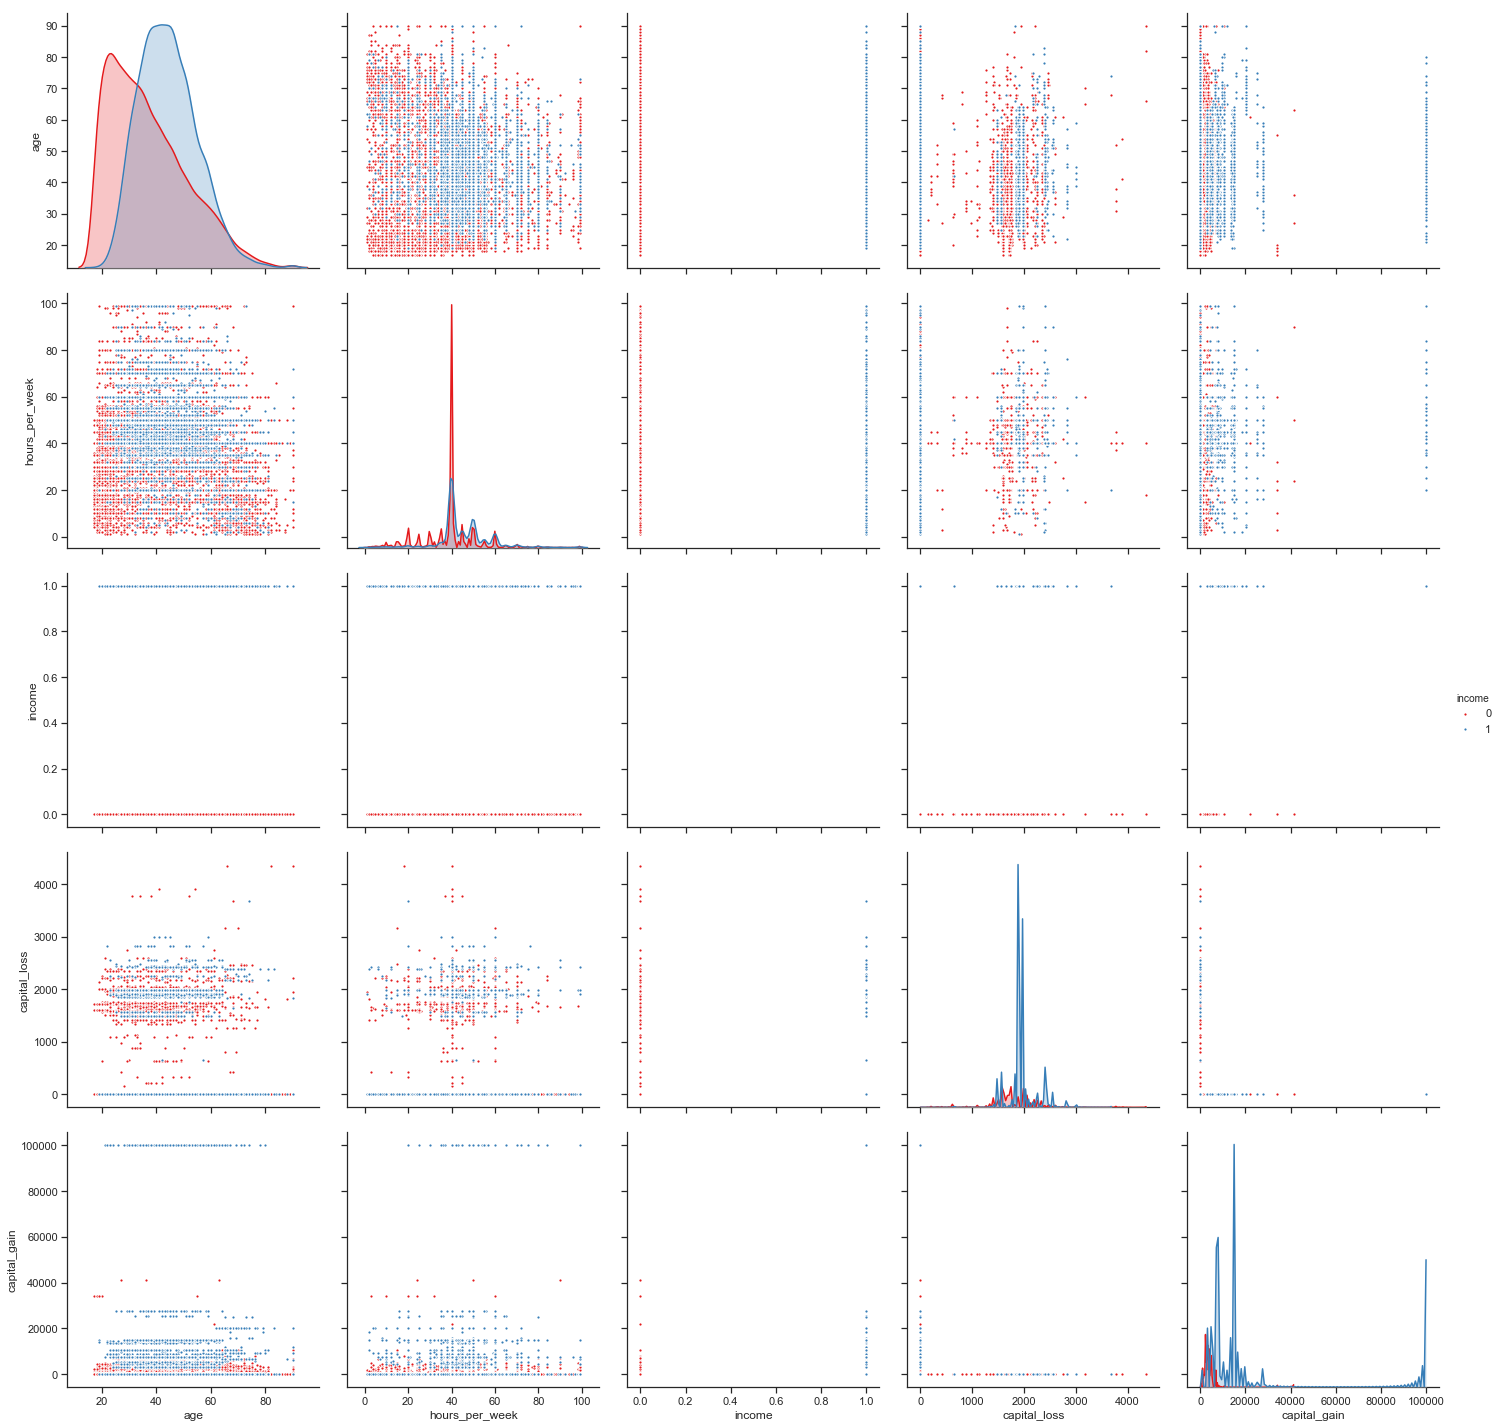

In [17]:

sns.set(style="ticks", color_codes=True)
sns.pairplot(df[['age','hours_per_week','income','capital_loss', 'capital_gain']], 
             hue="income", 
             height=4,
             palette="Set1",
             markers=".")
plt.show()

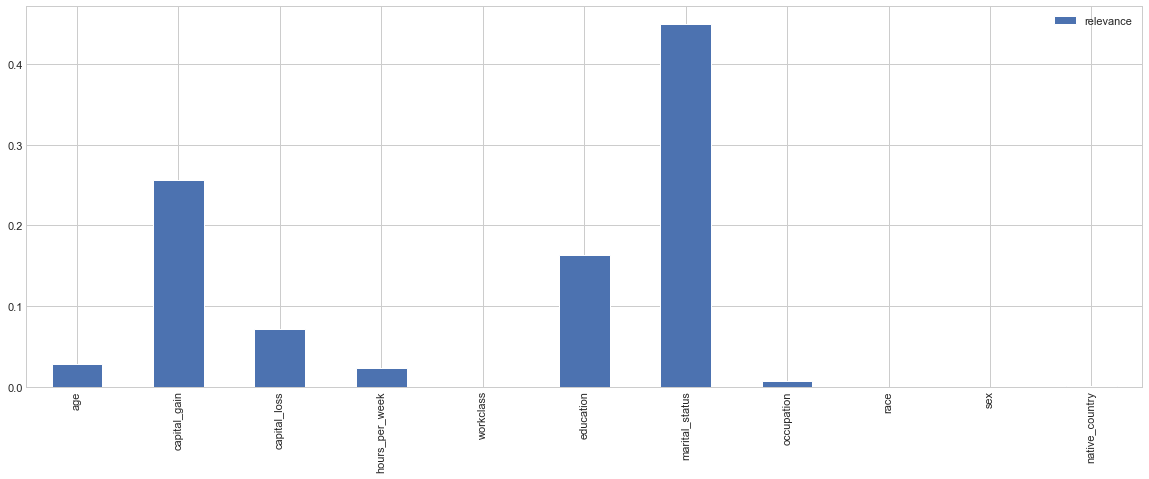

In [18]:
# Using Random Forest to gain an insight on the sicriminating power of each feature

rf = RandomForestClassifier(n_estimators=100, criterion = 'gini', max_features = None, min_samples_split = 0.05, min_samples_leaf = 0.001)
rf.fit(df_encoded.drop(['income','Unnamed: 0', 'fnl_samp_wgt'], 1), df_encoded['income'])

plt.style.use('seaborn-whitegrid')
relevance = rf.feature_importances_
relevance = pd.DataFrame(relevance, index=df_encoded.drop(['income', 'Unnamed: 0', 'fnl_samp_wgt'], 1).columns, columns=["relevance"])
relevance.plot(kind='bar', figsize=(20,7))

plt.show()


In [19]:
# Observation 1: From the random forest picks (based on purety), it looks like the sampling weight, the age, 
# and the marital status of the candidates are the most discrimant features. 

In [20]:
# Observation 2: The fact that the sampling weight is highly discriminant means that there are large
# differences in the weights assigned, certain categories of population being more represented than others. 
# As this parameter is representative of the census process and does not convey insight on individuals, I am 
# ignoring it in the prediction procedure.